In [1]:
import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.corpus import wordnet
# Install nltk library
!pip install nltk
# Download the 'punkt' package from nltk, which contains data required for tokenization.
nltk.download('punkt')
#`stopwords` is a module in the `nltk` library. It is used to remove stop words
from nltk.corpus import stopwords
stopwords.words('Somali1')
nltk.download('stopwords') 
# Download the 'wordnet' resource (if you haven't done it already)
nltk.download('wordnet')
# Initialize the lemmatizer
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
#`string` is a module in the Python standard library. It is used to manipulate
import string
string.punctuation
# wordcloud is a library for creating word clouds. It is used to visualize text data.
# Install the wordcloud library
!pip install wordcloud
# Now you can import the WordCloud class
from wordcloud import WordCloud

from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
# TfidfVectorizer is a class in the sklearn library. It is used to create a term frequency-inverse document frequency representation of a text document.
# CountVectorizer is a class in the sklearn library. It is used to create a bag-of-words representation of a text document.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
# RandomForestClassifier is an ensemble learning method that constructs a multitude 
# of decision trees and outputs the class that is the mode of the classes predicted by individual trees.
from sklearn.ensemble import RandomForestClassifier

# MultinomialNB implements the Multinomial Naive Bayes algorithm for classification. 
#It is suitable for discrete features such as word counts.
from sklearn.naive_bayes import MultinomialNB

# GaussianNB implements the Gaussian Naive Bayes algorithm for classification. 
#It assumes that features follow a Gaussian distribution.
from sklearn.naive_bayes import GaussianNB

# BernoulliNB implements the Bernoulli Naive Bayes algorithm for classification. 
#It is suitable for binary/boolean features.
from sklearn.naive_bayes import BernoulliNB

# DecisionTreeClassifier is a classifier based on the decision tree algorithm. 
#It splits the data based on the values of the features to make predictions.
from sklearn.tree import DecisionTreeClassifier

# AdaBoostClassifier is an ensemble learning method that combines multiple weak 
#classifiers to create a strong classifier. It adjusts the weights of the instances to focus on misclassified samples.
from sklearn.ensemble import AdaBoostClassifier

# ExtraTreesClassifier is an ensemble learning method that constructs a multitude 
#of decision trees and outputs the class that is the mode of the classes predicted by individual trees. It differs from RandomForestClassifier in the way it builds the decision trees.
from sklearn.ensemble import ExtraTreesClassifier

# LogisticRegression is a linear classification algorithm that models the probability 
#of the default class using logistic function.
from sklearn.linear_model import LogisticRegression

# KNeighborsClassifier is a classification algorithm that assigns the class based on 
#the majority vote of its k-nearest neighbors in the feature space.
from sklearn.neighbors import KNeighborsClassifier

# SVC (Support Vector Classifier) is a classification algorithm that separates data 
#points using hyperplanes and aims to maximize the margin between the classes.
from sklearn.svm import SVC


# accuracy_score is a metric that measures the accuracy of classification models by 
#comparing the predicted labels with the true labels.
from sklearn.metrics import accuracy_score
# confusion_matrix is a metric that computes the confusion matrix to evaluate the performance of a classification model.
from sklearn.metrics import confusion_matrix
# precision_score is a metric that calculates the precision of a classification model, 
#which measures the ability to correctly identify positive samples.
from sklearn.metrics import precision_score
from sklearn.preprocessing import LabelEncoder
# pickle is a module in the Python standard library used for object serialization and 
#deserialization, allowing models to be saved and loaded.
import pickle

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lafoole\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lafoole\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lafoole\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lafoole\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
df = pd.read_csv("Graduation Dataset.csv", encoding='unicode_escape')

In [3]:
df.head()

,Compliant_Text,Category
0,Waxaan ka cabanayaa in maadooyin qaar oo aan m...,0
1,Waxaan ka cabanayaa xiisadaha badan ee u baaqd...,0
2,Waxaan ka cabanayaa mideysnaan la'aanta ka jir...,0
3,Waxaan ka cabanayaa macallimiinta oo aan fasal...,0
4,Waxaan ka cabanayaa in ardayda aan la siinin w...,0


In [4]:
# Shuffling the DataFrame
df_shuffled = df.sample(frac=1, random_state=1).reset_index(drop=True)
df_shuffled

,Compliant_Text,Category
0,Waxaan ka cabanayaa la'aanta barnaamijyada isd...,0
1,Waxan ka cabanaya muraxada fasalka o ku filnen...,2
2,Waxay la kulmaan safaf dhaadheer iyo sugid aan...,1
3,Ardayda waxay wajahayaan dhibaatooyin maaliyad...,1
4,Kharashyada xafladaha qalin-jabinta ayaa aad u...,1
...,...,...
3024,Meelaha fadhiga iyo xarumaha fadhi-ku-dirirka ...,2
3025,Jaamacaddu waxay ku guuldareysatay inay xiriir...,0
3026,Waxaan ka cabanayaa habka loo maareeyo bixin...,1
3027,Waxaan ka cabanayaa Fursadaha waxbarasho ee dh...,0


In [5]:
df.tail()

,Compliant_Text,Category
3024,Qalabka tababarka cilmiga hogaaminta iyo maara...,2
3025,Qalabka shaybaarka microbiology-ga caafimaadka...,2
3026,Qalabka shaybaarka barashada qaybaha nolosha e...,2
3027,Qalabka tababarka barashada farsamooyinka xool...,2
3028,Qalabka shaybaarka barashada hababka deegaanka...,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3029 entries, 0 to 3028
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Compliant_Text  3029 non-null   object
 1   Category        3029 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.5+ KB


In [7]:
# Number of columns and rows
df.shape

(3029, 2)

### Missing Values and Handling

In [8]:
df.isnull()

,Compliant_Text,Category
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
3024,False,False
3025,False,False
3026,False,False
3027,False,False


In [9]:
# checking columns that has null values
df.isnull().sum()

Compliant_Text    0
Category          0
dtype: int64

In [10]:
# Calculate the percentage of null values in each column
df.isnull().sum() / len(df) * 100

Compliant_Text    0.0
Category          0.0
dtype: float64

In [11]:
# checking rows that has missing values
df.isnull().any()

Compliant_Text    False
Category          False
dtype: bool

In [12]:
# handling any missing values using dropna in rows
clean_data=df.dropna()
clean_data.head()

,Compliant_Text,Category
0,Waxaan ka cabanayaa in maadooyin qaar oo aan m...,0
1,Waxaan ka cabanayaa xiisadaha badan ee u baaqd...,0
2,Waxaan ka cabanayaa mideysnaan la'aanta ka jir...,0
3,Waxaan ka cabanayaa macallimiinta oo aan fasal...,0
4,Waxaan ka cabanayaa in ardayda aan la siinin w...,0


In [13]:
# handling any missing values using dropna in columns
cleaned_df = df.dropna(axis=1)
cleaned_df.head()

,Compliant_Text,Category
0,Waxaan ka cabanayaa in maadooyin qaar oo aan m...,0
1,Waxaan ka cabanayaa xiisadaha badan ee u baaqd...,0
2,Waxaan ka cabanayaa mideysnaan la'aanta ka jir...,0
3,Waxaan ka cabanayaa macallimiinta oo aan fasal...,0
4,Waxaan ka cabanayaa in ardayda aan la siinin w...,0


In [14]:
# checking again any missing values
clean_data.isna().sum()

Compliant_Text    0
Category          0
dtype: int64

### Duplicates

In [15]:
# checking duplicate value
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3024    False
3025    False
3026    False
3027    False
3028    False
Length: 3029, dtype: bool

In [16]:
#removing any duplicate rows
df.drop_duplicates(inplace=True)

In [17]:
# summzaring if there is a duplicate row
df.duplicated().value_counts()

False    2638
Name: count, dtype: int64

In [18]:
# getting count the number of duplicate rows
df.duplicated().sum()

0

### Descriptive Statistics

In [19]:
# Numerical summary
df.describe()

,Category
count,2638.000000
mean,1.008340
std,0.862969
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [20]:
# Categorical summary
df.describe(include=['object'])

,Compliant_Text
count,2638
unique,2638
top,Waxaan ka cabanayaa in maadooyin qaar oo aan m...
freq,1


In [21]:
# both numerical and Categorical summary
df.describe(include='all')

,Compliant_Text,Category
count,2638,2638.000000
unique,2638,NaN
top,Waxaan ka cabanayaa in maadooyin qaar oo aan m...,NaN
freq,1,NaN
mean,NaN,1.008340
std,NaN,0.862969
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,1.000000
75%,NaN,2.000000


In [22]:
#Total of data
x,y,z= df['Category'].value_counts()
print("Total of Academic Compliants:",x)
print("Total of not finance Compliants:",y)
print("Total of not equipment Compliants:",z)

Total of Academic Compliants: 993
Total of not finance Compliants: 971
Total of not equipment Compliants: 674


In [23]:
df['Complaint_Text'] = df['Compliant_Text'].apply(str)  # Ensure all entries are strings
#df['Complaint_Text'] = df['Complaint_Text'].apply(lambda text: re.sub(r'\d+', '', text))  # Remove numbers

In [24]:
# Define the clean_text function
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs with a simpler pattern
    text = re.sub(r'http\S+', '', text)
    # Remove most special characters (keep whitespace and tabs)
    text = re.sub(r'[^0-9a-zA-Z \t]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    # Remove HTML tags and formatting artifacts using BeautifulSoup
    soup = BeautifulSoup(text, 'html.parser')
    # Extract text content and remove extra spaces
    clean_text = soup.get_text(separator=' ').strip()
    # Remove basic emojis and emoticons using a regular expression
    clean_text = re.sub(r'[^\w\s\!\?\.\:\;\)]+|\(\:[^\)]+\)', '', clean_text)
    return clean_text

# Example usage
input_text = "This class is <b> sooo hard</b>!!!   <br> <i>Can't</i> understand  8 the prof! #helpastudent <li>Item 1</li>"
cleaned_text = clean_text(input_text)
print("Cleaned text:", cleaned_text)

# Print the 'Complaint_Text' column before cleaning
#print("Before cleaning:")
#print(df["Complaint_Text"].head())

# Apply the comprehensive cleaning function
#df["Complaint_Text"] = df["Complaint_Text"].apply(clean_text)

# Print the 'Complaint_Text' column after cleaning
#print("After cleaning:")
#print(df["Complaint_Text"].head())

Cleaned text: this class is b sooo hardb br icanti understand 8 the prof helpastudent liitem 1li


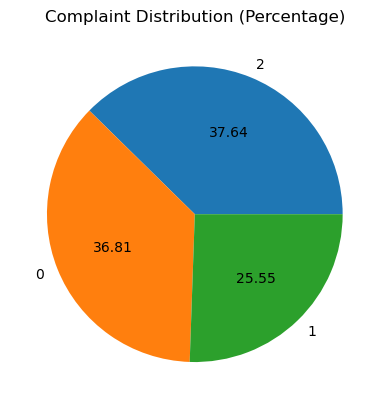

In [25]:
complaint_counts = df['Category'].value_counts()

# Extract labels from the index (assuming categorical data)
labels = complaint_counts.index.to_numpy()  # Convert to NumPy array for compatibility

# Create the pie chart
plt.pie(complaint_counts, labels=labels, autopct="%0.2f")
plt.title("Complaint Distribution (Percentage)")
plt.show()

Text(0, 0.5, 'Count')

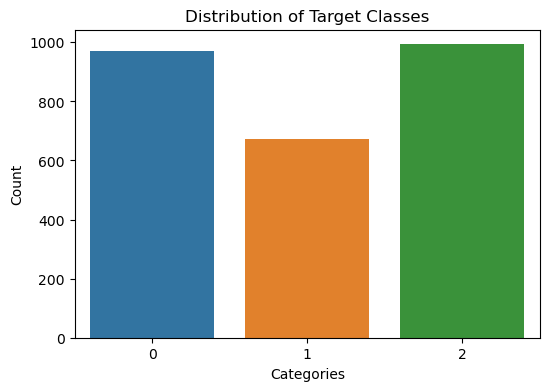

In [26]:
# Visualize the distribution of target classes
plt.figure(figsize=(6, 4))
sns.countplot(x='Category', data=df)
plt.title('Distribution of Target Classes')
plt.xlabel('Categories')
plt.ylabel('Count')

### Tokenization

In [27]:
# Calculating the number of characters
df['num_characters'] = df['Complaint_Text'].apply(len)
# num of words
df['num_words'] = df['Complaint_Text'].apply(lambda x:len(nltk.word_tokenize(x)))
#Number of sentences
df['num_sentences'] = df['Complaint_Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,Compliant_Text,Category,Complaint_Text,num_characters,num_words,num_sentences
0,Waxaan ka cabanayaa in maadooyin qaar oo aan m...,0,Waxaan ka cabanayaa in maadooyin qaar oo aan m...,1027,165,4
1,Waxaan ka cabanayaa xiisadaha badan ee u baaqd...,0,Waxaan ka cabanayaa xiisadaha badan ee u baaqd...,733,123,7
2,Waxaan ka cabanayaa mideysnaan la'aanta ka jir...,0,Waxaan ka cabanayaa mideysnaan la'aanta ka jir...,807,120,5
3,Waxaan ka cabanayaa macallimiinta oo aan fasal...,0,Waxaan ka cabanayaa macallimiinta oo aan fasal...,912,153,7
4,Waxaan ka cabanayaa in ardayda aan la siinin w...,0,Waxaan ka cabanayaa in ardayda aan la siinin w...,659,111,5



## Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Lemmatization

In [29]:
def transform_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text into words
    text = nltk.word_tokenize(text)
    
    # Remove non-alphanumeric characters
    text = [i for i in text if i.isalnum()]
    
    # Remove stopwords and punctuation
    stop_words = stopwords.words('Somali1') + list(string.punctuation)
    text = [i for i in text if i not in stop_words]
    
    # Perform lemmatization using WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = []
    for word in text:
        pos_tag = nltk.pos_tag([word])[0][1][0].lower()
        if pos_tag in ['n', 'v', 'a', 'r']:
            lemmatized_text.append(lemmatizer.lemmatize(word, pos_tag))
        else:
            lemmatized_text.append(word)
    
    # Join the processed words back into a single string
    return " ".join(lemmatized_text)

# Example usage
somali_text = " this is lemmatization sentence : (I am loving these examples provided)!"

processed_text = transform_text(somali_text)

print(processed_text)


this lemmatization sentence be love these example provide


In [30]:
transform_text("Waxaan ka cabanayaa nidaamka waxbarashada qaasatan maadooyinka aan barano!")

'waxaan cabanayaa nidaamka waxbarashada qaasatan maadooyinka barano'

In [31]:
df.head()

,Compliant_Text,Category,Complaint_Text,num_characters,num_words,num_sentences
0,Waxaan ka cabanayaa in maadooyin qaar oo aan m...,0,Waxaan ka cabanayaa in maadooyin qaar oo aan m...,1027,165,4
1,Waxaan ka cabanayaa xiisadaha badan ee u baaqd...,0,Waxaan ka cabanayaa xiisadaha badan ee u baaqd...,733,123,7
2,Waxaan ka cabanayaa mideysnaan la'aanta ka jir...,0,Waxaan ka cabanayaa mideysnaan la'aanta ka jir...,807,120,5
3,Waxaan ka cabanayaa macallimiinta oo aan fasal...,0,Waxaan ka cabanayaa macallimiinta oo aan fasal...,912,153,7
4,Waxaan ka cabanayaa in ardayda aan la siinin w...,0,Waxaan ka cabanayaa in ardayda aan la siinin w...,659,111,5


In [32]:
#applying datasets without stopword and others adds in all datasets incloude text
df['transformed_text'] = df['Complaint_Text'].apply(str).apply(transform_text)

In [33]:
df.head()

,Compliant_Text,Category,Complaint_Text,num_characters,num_words,num_sentences,transformed_text
0,Waxaan ka cabanayaa in maadooyin qaar oo aan m...,0,Waxaan ka cabanayaa in maadooyin qaar oo aan m...,1027,165,4,waxaan cabanayaa maadooyin qaar muhiimad weyn ...
1,Waxaan ka cabanayaa xiisadaha badan ee u baaqd...,0,Waxaan ka cabanayaa xiisadaha badan ee u baaqd...,733,123,7,waxaan cabanayaa xiisadaha baaqda maqnaanshaha...
2,Waxaan ka cabanayaa mideysnaan la'aanta ka jir...,0,Waxaan ka cabanayaa mideysnaan la'aanta ka jir...,807,120,5,waxaan cabanayaa mideysnaan jaamacadaha ardayd...
3,Waxaan ka cabanayaa macallimiinta oo aan fasal...,0,Waxaan ka cabanayaa macallimiinta oo aan fasal...,912,153,7,waxaan cabanayaa macallimiinta fasalka lagula ...
4,Waxaan ka cabanayaa in ardayda aan la siinin w...,0,Waxaan ka cabanayaa in ardayda aan la siinin w...,659,111,5,waxaan cabanayaa ardayda siinin fursado prakti...


## Visualization

In [34]:
#wc varaible assign to show worldcloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [35]:
#shows as worldcloud in Academic Compliants
Academic_Compliant = wc.generate(df[df['Category'] == 0]['transformed_text'].str.cat(sep=" "))

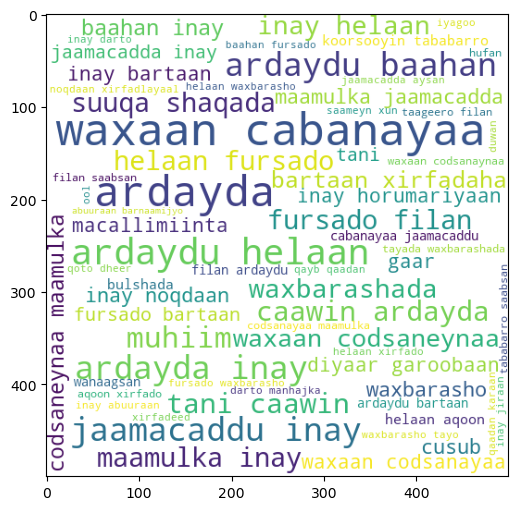

In [36]:
plt.figure(figsize=(15,6))
plt.imshow(Academic_Compliant)

In [37]:
#shows as worldcloud in Finance Compliants
Finance_Compliant = wc.generate(df[df['Category'] == 1]['transformed_text'].str.cat(sep=" "))

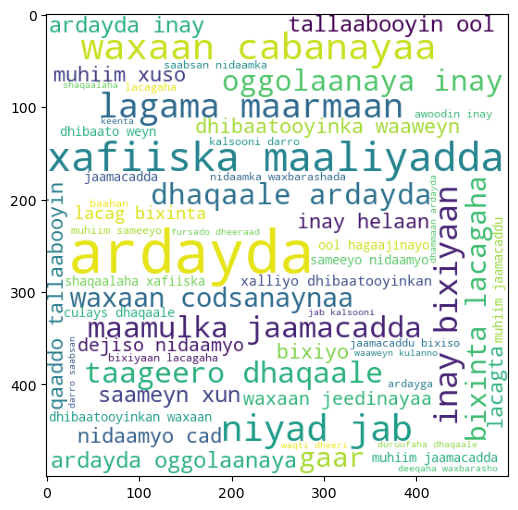

In [38]:
plt.figure(figsize=(15,6))
plt.imshow(Finance_Compliant)

In [39]:
#shows as worldcloud in Equipment Compliants
Equipment_Compliant = wc.generate(df[df['Category'] == 2]['transformed_text'].str.cat(sep=" "))

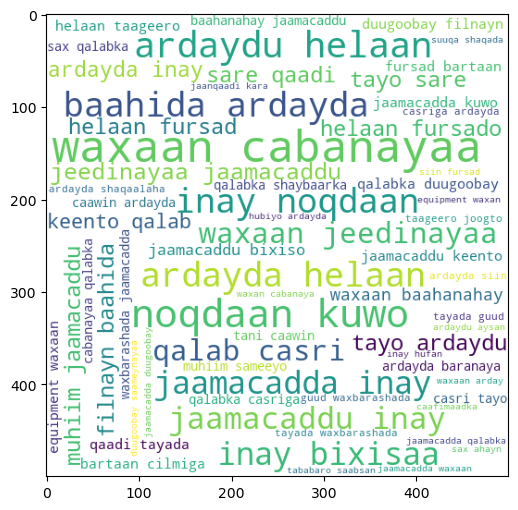

In [40]:
plt.figure(figsize=(15,6))
plt.imshow(Equipment_Compliant)

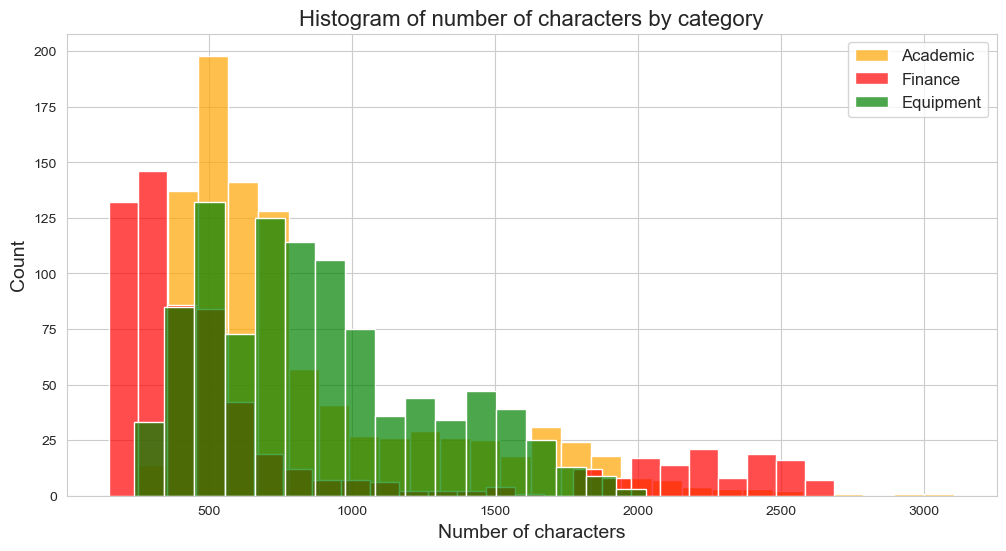

In [41]:
plt.figure(figsize=(12,6))

# Set the style
sns.set_style("whitegrid")

# Plot the histograms with different styles
sns.histplot(df[df['Category'] == 0]['num_characters'],  color='orange', alpha=0.7)
sns.histplot(df[df['Category'] == 1]['num_characters'],  color='red', alpha=0.7)
sns.histplot(df[df['Category'] == 2]['num_characters'],  color='green', alpha=0.7)

# Add a legend
plt.legend(['Academic', 'Finance', 'Equipment'], loc='upper right', fontsize=12)

# Add labels and title
plt.xlabel('Number of characters', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Histogram of number of characters by category', fontsize=16)

# Adjust the tick label font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

<Axes: xlabel='num_words', ylabel='Count'>

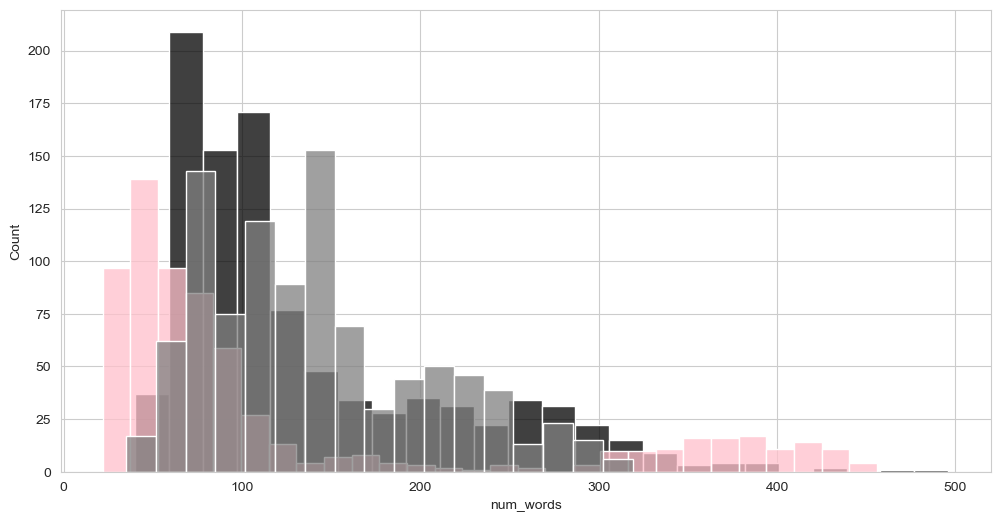

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category'] == 0]['num_words'],color='black')
sns.histplot(df[df['Category'] == 1]['num_words'],color='pink')
sns.histplot(df[df['Category'] == 2]['num_words'],color='gray')

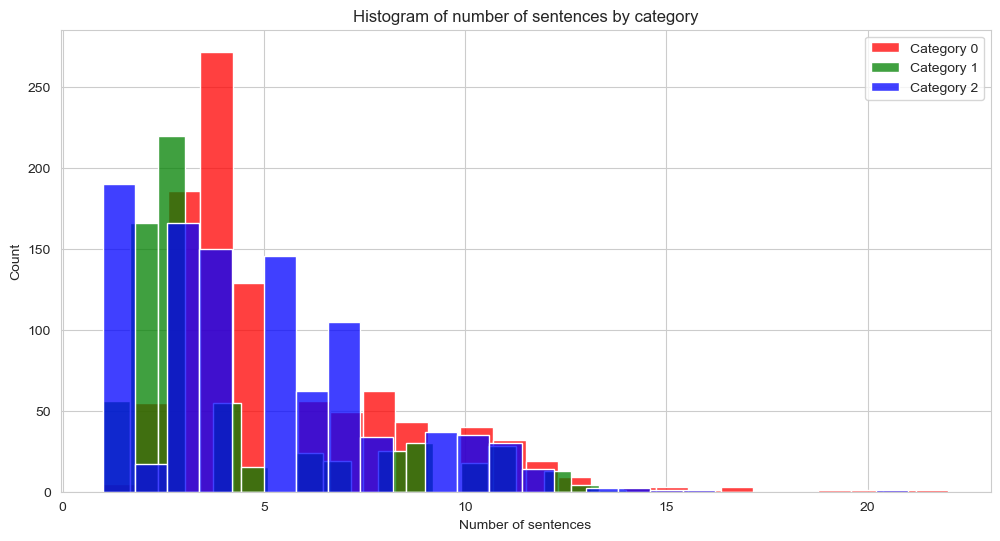

In [43]:
plt.figure(figsize=(12,6))

# Use different colors for each category
sns.histplot(df[df['Category'] == 0]['num_sentences'], color='r')
sns.histplot(df[df['Category'] == 1]['num_sentences'], color='g')
sns.histplot(df[df['Category'] == 2]['num_sentences'], color='b')

# Add a legend
plt.legend(['Category 0', 'Category 1', 'Category 2'])

# Add labels and title
plt.xlabel('Number of sentences')
plt.ylabel('Count')
plt.title('Histogram of number of sentences by category')

plt.show()

C:\Users\Lafoole\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


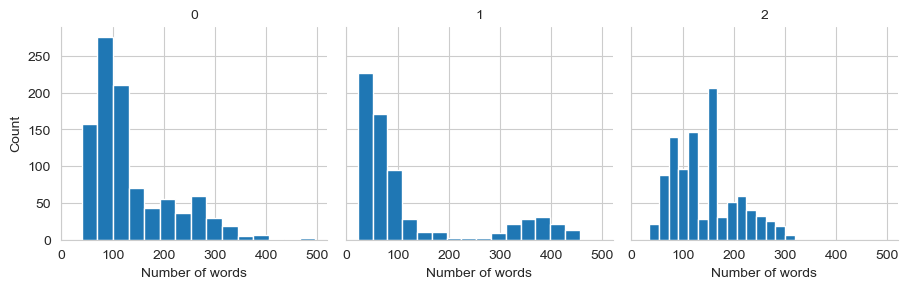

In [44]:
graph = sns.FacetGrid(data=df, col='Category')
graph.map(plt.hist, 'num_words', bins=15)
graph.set_axis_labels('Number of words', 'Count')
graph.set_titles('{col_name}')

C:\Users\Lafoole\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Lafoole\AppData\Local\Temp\ipykernel_6360\1327538205.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to fit the title


<Figure size 1200x1200 with 0 Axes>

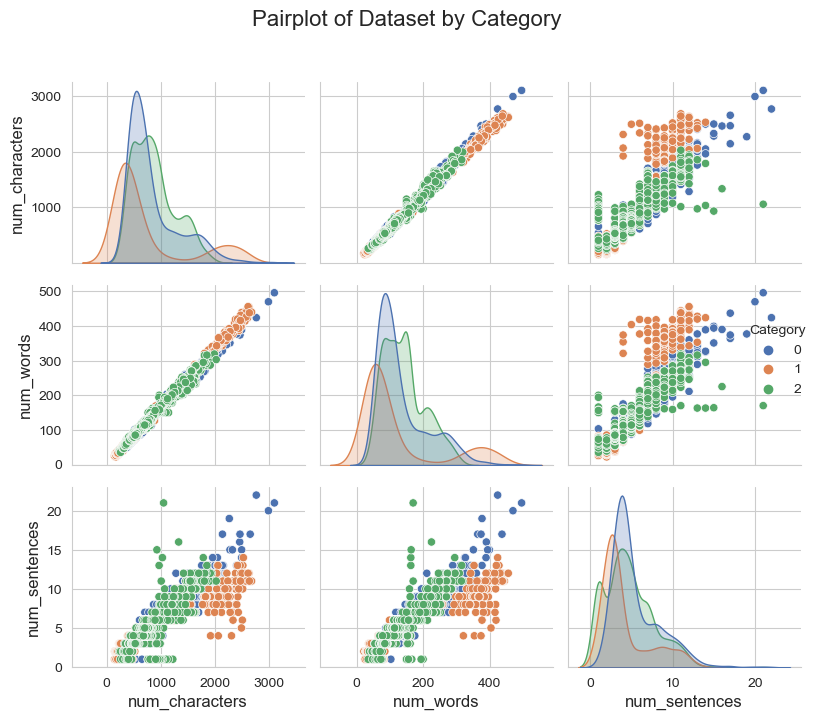

In [45]:
plt.figure(figsize=(12, 12))  # Adjust the figure size
sns.pairplot(df, hue='Category', palette=['#4C72B0', '#DD8452', '#55A868'])  # Use a custom color palette
plt.suptitle('Pairplot of Dataset by Category', fontsize=16)  # Add a main title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to fit the title

# Customize the plot labels and tick labels
for ax in plt.gcf().axes:
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
    ax.set_ylabel(ax.get_ylabel(), fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)

plt.show()

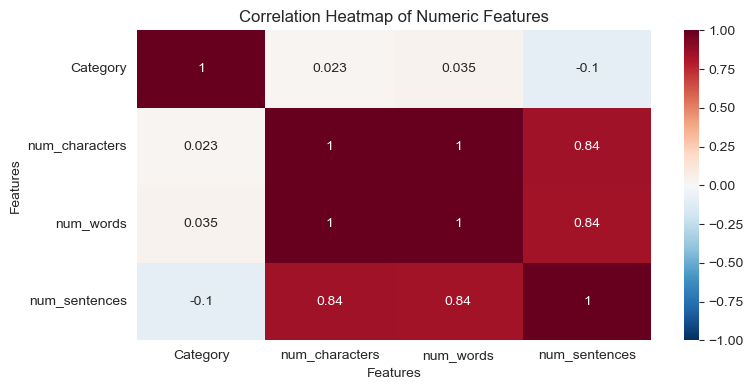

In [46]:
# display the correlation matrix of the numeric features in the DataFrame
plt.figure(figsize=(8, 4))  # Adjust the figure size
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdBu_r', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numeric Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [47]:
df.head()

,Compliant_Text,Category,Complaint_Text,num_characters,num_words,num_sentences,transformed_text
0,Waxaan ka cabanayaa in maadooyin qaar oo aan m...,0,Waxaan ka cabanayaa in maadooyin qaar oo aan m...,1027,165,4,waxaan cabanayaa maadooyin qaar muhiimad weyn ...
1,Waxaan ka cabanayaa xiisadaha badan ee u baaqd...,0,Waxaan ka cabanayaa xiisadaha badan ee u baaqd...,733,123,7,waxaan cabanayaa xiisadaha baaqda maqnaanshaha...
2,Waxaan ka cabanayaa mideysnaan la'aanta ka jir...,0,Waxaan ka cabanayaa mideysnaan la'aanta ka jir...,807,120,5,waxaan cabanayaa mideysnaan jaamacadaha ardayd...
3,Waxaan ka cabanayaa macallimiinta oo aan fasal...,0,Waxaan ka cabanayaa macallimiinta oo aan fasal...,912,153,7,waxaan cabanayaa macallimiinta fasalka lagula ...
4,Waxaan ka cabanayaa in ardayda aan la siinin w...,0,Waxaan ka cabanayaa in ardayda aan la siinin w...,659,111,5,waxaan cabanayaa ardayda siinin fursado prakti...


## Word Embedding

In [48]:
# CountVectorizer and TfidfVectorizer are initialized
# CountVectorizer is used for creating a matrix of token counts
# TfidfVectorizer is used for creating a matrix of TF-IDF features
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [49]:
# x variable assigns a tfidf to fit adatasets without stopwords and puncution
# The 'transformed_text' column of the DataFrame is passed to the TfidfVectorizer's fit_transform() method
# The text is transformed into a matrix of TF-IDF features
# toarray() converts the sparse matrix representation to a dense matrix
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [50]:
# X.shape returns the shape of the matrix X, indicating the number of instances and features
X.shape
y = df['Category'].values

In [51]:
# Encode the labels using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [52]:
# data trains 20% training or 0.2 a training and other 80% or 0.8 are test
# The data is split into training and testing sets
# X and y are split into X_train, X_test, y_train, y_test respectively
# test_size=0.2 specifies that 20% of the data will be used for testing
# random_state=2 sets a specific random state to ensure reproducibility
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [53]:
# Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Bernoulli Naive Bayes classifier
bnb = BernoulliNB()

# Random Forest classifier with 600 estimators
RF = RandomForestClassifier(n_estimators=600)

# Decision Tree classifier with entropy as the criterion and random state set to 42
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)

# AdaBoost classifier
Ads = AdaBoostClassifier()

# Extra Trees classifier
extra = ExtraTreesClassifier()

# Logistic Regression classifier
logis = LogisticRegression()

# K-Nearest Neighbors classifier
knc = KNeighborsClassifier()

# Support Vector Classifier with sigmoid kernel and gamma set to 1.0
svc = SVC(kernel='sigmoid', gamma=1.0)

In [54]:
# Train the Gaussian Naive Bayes classifier
gnb.fit(X_train, y_train)
# Make predictions on the test set
y_pred_gnb = gnb.predict(X_test)

# Evaluate the GNB classifier
gnb_accuracy = accuracy_score(y_test, y_pred_gnb)
print(f"Gaussian Naive Bayes Accuracy: {gnb_accuracy * 100:.2f}%")

# Using y_pred_rf for confusion matrix and precision
conf_matrix = confusion_matrix(y_test, y_pred_gnb)
print(conf_matrix)

# To compute precision score, you also need to specify the 'average' parameter if your problem is multi-class.
precision = precision_score(y_test, y_pred_gnb, average='macro')  # or 'micro', 'weighted', depending on your specific case
print(f"Gaussian Naive Bayes precision score: {precision * 100:.2f}%")

Gaussian Naive Bayes Accuracy: 80.11%
[[152  16  10]
 [ 12 117   8]
 [ 48  11 154]]
Gaussian Naive Bayes precision score: 80.83%


In [55]:
#Train Multinomial Naive Bayes
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

#Evaluate the mnb classifier
mnb_accuracy = accuracy_score(y_test, y_pred_mnb)
print(f"Multinomial Naive Bayes Accuracy: {mnb_accuracy * 100:.2f}%")


conf_matrix = confusion_matrix(y_test, y_pred_mnb)
print(conf_matrix)


precision = precision_score(y_test, y_pred_mnb, average='macro')  # or 'micro', 'weighted', depending on your specific case
print(f"Multinomial Naive Bayes precision score: {precision * 100:.2f}%")

Multinomial Naive Bayes Accuracy: 86.93%
[[166   8   4]
 [  5 128   4]
 [ 39   9 165]]
Multinomial Naive Bayes precision score: 87.57%


In [56]:
# Train the Bernoulli Naive Bayes classifier
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)

# Evaluate the BNB classifier
bnb_accuracy = accuracy_score(y_test, y_pred_bnb)
print(f"Bernoulli Naive Bayes Accuracy: {bnb_accuracy * 100:.2f}%")


conf_matrix = confusion_matrix(y_test, y_pred_bnb)
print(conf_matrix)


precision = precision_score(y_test, y_pred_bnb, average='macro')  # or 'micro', 'weighted', depending on your specific case
print(f"Bernoulli Naive Bayes precision score: {precision * 100:.2f}%")


Bernoulli Naive Bayes Accuracy: 87.88%
[[153  16   9]
 [  2 128   7]
 [ 20  10 183]]
Bernoulli Naive Bayes precision score: 87.50%


In [57]:
# Train the Random Forest classifier
RF.fit(X_train, y_train)
# Make predictions on the test set
y_pred_rf = RF.predict(X_test)

# Evaluate the RF classifier
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")

# Using y_pred_RF for confusion matrix and precision
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix)

# To compute precision score, you also need to specify the 'average' parameter if your problem is multi-class.
precision = precision_score(y_test, y_pred_rf, average='macro')  # or 'micro', 'weighted', depending on your specific case
print(f"Random Forest precision score: {precision * 100:.2f}%")

Random Forest Accuracy: 92.23%
[[173   1   4]
 [  3 132   2]
 [ 26   5 182]]
Random Forest precision score: 92.70%


In [58]:
# Train the Decision Tree classifier
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluate the DT classifier
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")


conf_matrix = confusion_matrix(y_test, y_pred_dt)
print(conf_matrix)


precision = precision_score(y_test, y_pred_dt, average='macro')  # or 'micro', 'weighted', depending on your specific case
print(f"Decision Tree precision score: {precision * 100:.2f}%")

Decision Tree Accuracy: 85.23%
[[151  11  16]
 [ 10 115  12]
 [ 17  12 184]]
Decision Tree precision score: 84.99%


In [59]:
# Train the Decision Tree classifier
Ads.fit(X_train, y_train)
y_pred_Ads = Ads.predict(X_test)

# Evaluate the DT classifier
Ads_accuracy = accuracy_score(y_test, y_pred_Ads)
print(f"Decision Tree Accuracy: {Ads_accuracy * 100:.2f}%")


conf_matrix = confusion_matrix(y_test, y_pred_Ads)
print(conf_matrix)


precision = precision_score(y_test, y_pred_Ads, average='macro')  # or 'micro', 'weighted', depending on your specific case
print(f"Decision Tree precision score: {precision * 100:.2f}%")

Decision Tree Accuracy: 87.69%
[[161   1  16]
 [  3 121  13]
 [ 25   7 181]]
Decision Tree precision score: 88.39%


In [60]:
# Train the Extra Trees classifier
extra.fit(X_train, y_train)
y_pred_ex = extra.predict(X_test)

# Evaluate the ex classifier
extra_accuracy = accuracy_score(y_test, y_pred_ex)
print(f"Extra Trees Accuracy: {extra_accuracy * 100:.2f}%")


conf_matrix = confusion_matrix(y_test, y_pred_ex)
print(conf_matrix)


precision = precision_score(y_test, y_pred_ex, average='macro')  # or 'micro', 'weighted', depending on your specific case
print(f"Extra Trees precision score: {precision * 100:.2f}%")

Extra Trees Accuracy: 93.56%
[[173   0   5]
 [  2 134   1]
 [ 22   4 187]]
Extra Trees precision score: 93.94%


In [61]:
# Train the Logistic Regression classifier
logis.fit(X_train, y_train)
y_pred_log = logis.predict(X_test)

# Evaluate the log classifier
logis_accuracy = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {logis_accuracy * 100:.2f}%")


conf_matrix = confusion_matrix(y_test, y_pred_log)
print(conf_matrix)


precision = precision_score(y_test, y_pred_log, average='macro')  # or 'micro', 'weighted', depending on your specific case
print(f"Logistic Regression precision score: {precision * 100:.2f}%")

Logistic Regression Accuracy: 91.86%
[[168   1   9]
 [  4 128   5]
 [ 17   7 189]]
Logistic Regression precision score: 92.04%


In [62]:
# Train the K-Nearest Neighbors classifier
knc.fit(X_train, y_train)
y_pred_knc = knc.predict(X_test)

# Evaluate the knc classifier
knc_accuracy = accuracy_score(y_test, y_pred_knc)
print(f"K-Nearest Neighbors Accuracy: {knc_accuracy * 100:.2f}%")


conf_matrix = confusion_matrix(y_test, y_pred_knc)
print(conf_matrix)


precision = precision_score(y_test, y_pred_knc, average='macro')  # or 'micro', 'weighted', depending on your specific case
print(f"K-Nearest Neighbors precision score: {precision * 100:.2f}%")

K-Nearest Neighbors Accuracy: 86.55%
[[155   5  18]
 [  5 124   8]
 [ 27   8 178]]
K-Nearest Neighbors precision score: 86.88%


In [63]:
# Train the Support Vector classifier
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

# Evaluate the svm classifier
svc_accuracy = accuracy_score(y_test, y_pred_svc)
print(f"Support Vector Accuracy: {svc_accuracy * 100:.2f}%")


conf_matrix = confusion_matrix(y_test, y_pred_svc)
print(conf_matrix)


precision = precision_score(y_test, y_pred_svc, average='macro')  
print(f"Support Vector precision score: {precision * 100:.2f}%")

Support Vector Accuracy: 92.42%
[[169   2   7]
 [  5 129   3]
 [ 15   8 190]]
Support Vector precision score: 92.41%


In [64]:
# Mapping of numeric values to category names
category_mapping = {0: 'Academic', 1: 'Finance', 2: 'Equipment'}

In [65]:
# Function to classify new complaints and return category name
def classify_complaint(complaint):
    cleaned_complaint = transform_text(complaint)
    vectorized_complaint = tfidf.transform([cleaned_complaint]).toarray()
    category_num = mnb.predict(vectorized_complaint)[0]
    category_name = category_mapping[category_num]
    return category_name

In [66]:
# Test the function with a new complaint
new_complaint = "waxaan ka cabanayaa nadaafad la'aanta ka jirto jaamacada"
print("Classified as:", classify_complaint(new_complaint))

Classified as: Equipment


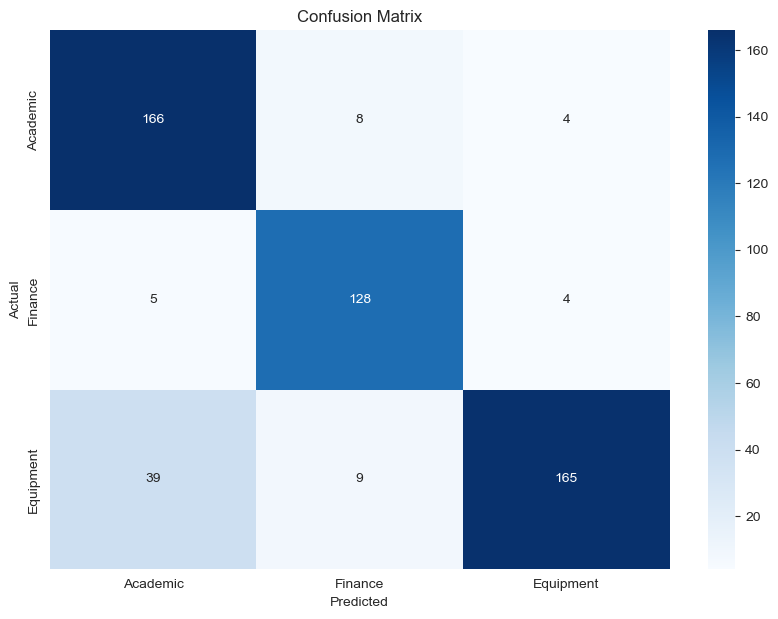

In [67]:
# Confusion matrix heatmap
conf_matrix = confusion_matrix(y_test, y_pred_mnb)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=category_mapping.values(), yticklabels=category_mapping.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [68]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [69]:
pickle.dump(label_encoder, open('label_encoder.pkl', 'wb'))